# Data Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data= pd.read_csv('titanic-passengers.csv',sep=';')
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [2]:
#Importing our dataset from csv file
import pandas as pd 
data=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(data)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


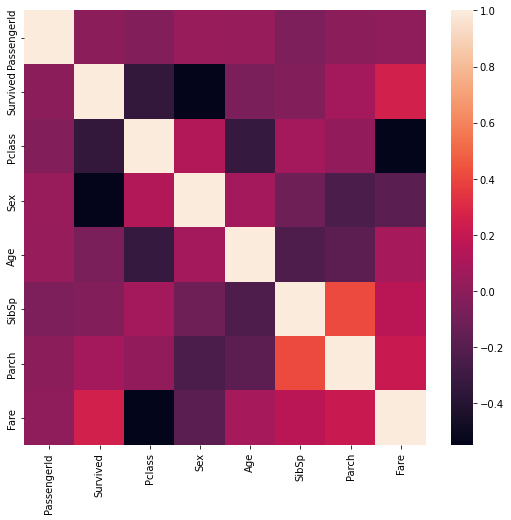

In [4]:
plt.figure(figsize=(9,8))
sns.heatmap(data.corr())

In [5]:
pd.DataFrame(data.corr()['Survived']).sort_values(by='Survived',ascending=False)

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.069809
Pclass,-0.338481
Sex,-0.543351


# Decision tree Model


In [6]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [7]:
#Numerical features extraction
x=data.drop(["Survived","Name","Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
clf= tree.DecisionTreeClassifier()  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7653631284916201


In [8]:
dtree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
dtree.fit(x_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
             random_state=None, splitter='random')
predict3 = dtree.predict(x_train)
print(predict3)

[0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0
 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1
 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1
 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 

# changing the parameters of our decision tree 
we try to **eliminate** other features like Age, Pclass and SibSp and we increase the size of our testing data to **0.3**.
Let's see the results.

In [9]:
#features extraction + Eliminating of some other features
x=data.drop(["Survived","Name","Cabin", "Ticket", "Embarked", "Age","Pclass","SibSp"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=10)

#applying tree algorithm
clf= tree.DecisionTreeClassifier()  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7649253731343284


the accuracy has lightly **decreased** that means the first model decision tree is more precise than the second one

# Random Forest model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X=data[['Fare', 'Parch']] #features
y=data['Survived']  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%


# first model

In [11]:
from sklearn import metrics  # Importing metrics to test accuracy
clf=RandomForestClassifier(n_estimators=100)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.6828358208955224


# Second model
Let's increase the **number** of **estimators**

In [15]:
from sklearn import metrics  # Importing metrics to test accuracy
clf=RandomForestClassifier(n_estimators=200)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.6902985074626866


# Discussion
As we can see by increasing the estimators to 200 the accuracy has been improved. In fact ,it becomes 0.69 which is better than the first Random Forest accuracy 0.68,  this confirms that our model does a good job of classifying data.